# Dynamics Problem Set No.1

Problem 1

In [42]:
import numpy as np
from scipy import linalg
with open('matrix_data.txt') as file:
    array2d = np.array([[float(digit) for digit in line.split()] for line in file])
lambdas = linalg.eig(array2d, b=None, left=False, right=False)
spectralradius = max(abs(lambdas))

i_max = 100000

def spectral_theorem(i):
    product = np.linalg.matrix_power(array2d,i)
    nu = np.ones(10)
    vector = product @ nu
    normvector = linalg.norm(vector, ord = 2)
    converge = normvector**(1/i)
    difference = converge - spectralradius
    return difference
       
sequence = []

for iter in range(1,i_max+1):
    sequence.append(spectral_theorem(iter))
    
sequence[-1]
    

1.200420037306138e-05

Problem 2

17.743539


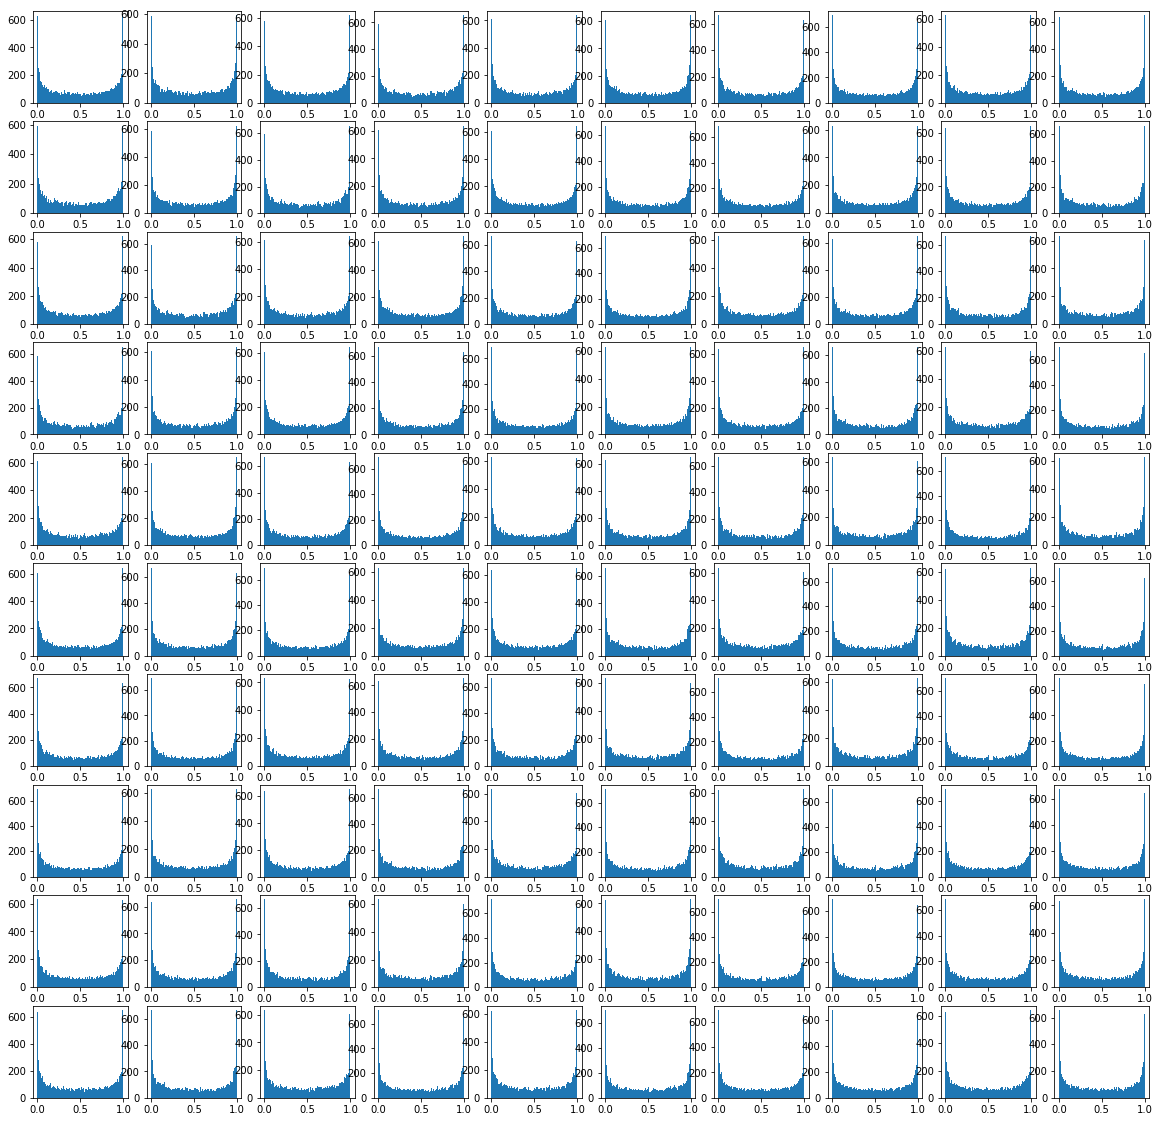

In [8]:
import time
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from numba import jit

timeseries_size=10000

@jit
def gx(x):
    gx = 4 * x * (1 - x)
    return gx

@jit
def timeseries(x):
    A = np.array(x)
    A = np.append(A, gx(x))
    iter = 1
    while iter < timeseries_size:
        A = np.append(A, gx(A[-1]))
        iter += 1
    return A

@jit
def initial_conditions():
    initial_conditions = np.empty(100)
    for i in range(100):
        initial_conditions[i] = np.random.uniform(0,1,1)
    return initial_conditions

@jit
def plotting():
    fig, ax = plt.subplots(10,10, figsize=(20,20))
    for i in range(10):
        for j in range(10):
            ax[i,j].hist(timeseries(init[i+j]), bins = 100)
    


time_start = time.clock()
init = initial_conditions()
plotting()
time_elapsed = (time.clock()-time_start)
print('time for computation is: ', time_elapsed)        
fig.savefig('plot.pdf')

Problem 3

We are given the following-
(i) $g$ is continuous at $\hat{x}$

(ii) $g^t(\hat{x}) \rightarrow \hat{x}$ as $x \rightarrow \infty$
